# ChIP-seq data for CAL51_troubleshooting experiment_Jul2018

## Find differentially bound peaks in ChIP-seq datasets

- [X] Venn diagrams for the overview of shared/unique peaks 
- [X] Find differential regions and generate MA plots highlighting IL1RN

Create all neccessary subfolders

In [1]:
%%bash
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/metadata
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks
mkdir -p /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/


In [2]:
%%bash
ln -s /data/reddylab/Hazel/troubleshoot/processing/chip_seq/CAL51_p300_ts-se/CAL51*.bam /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads 2> /dev/null
ln -s /data/reddylab/Hazel/troubleshoot/processing/chip_seq/CAL51_p300_ts-se/CAL51*.bam.bai /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads 2> /dev/null
ln -s /data/reddylab/Hazel/troubleshoot/processing/chip_seq/CAL51_p300_ts-se/CAL51*.narrowPeak /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/ 2> /dev/null

Brief reminder of the QCs

In [1]:
import pandas as pd
qc_df = pd.read_csv('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/CAL51_p300_ts-se/qc.txt')
qc_df[["ctrl" not in v for v in qc_df['sample'].values]]

,sample,raw,trimmed,mapped,percentage_unique,mapped_and_filtered,percentage_unique_mapped_and_filtered,in_broadpeaks,in_narrowpeaks,percent_in_broadpeaks,percent_in_narrowpeaks,broadPeak_count,narrowPeak_count,NRF,PBC,NSC,RSC
0,CAL51.p300.DMSO.rep1,2435686,2388106,2100367,87.951163,2087484,87.411698,118892,99091,5.695469,4.746911,5340,4377,NaN,0.954897,1.394072,1.562069
1,CAL51.p300.DMSO.rep2,2051768,2011139,1770798,88.049508,1759324,87.478986,124356,104521,7.068397,5.940975,5217,4438,NaN,0.951589,1.528536,1.802543
2,CAL51.p300.DMSO.rep3,2045641,2006205,1770720,88.262167,1758771,87.666564,120078,101974,6.827381,5.798026,5292,4523,NaN,0.951531,1.523605,1.823908
3,CAL51.p300.JQ1.rep1,2326212,2281668,2001746,87.731695,1980993,86.822141,212229,186401,10.713263,9.409473,7799,6986,NaN,0.941693,2.019730,1.699833
4,CAL51.p300.JQ1.rep2,2266563,2222195,1954658,87.960688,1933391,87.003661,158281,135021,8.186704,6.983637,6653,5659,NaN,0.944597,1.666275,1.681967
5,CAL51.p300.JQ1.rep3,2604819,2553784,2219726,86.919097,2151245,84.237547,164093,141820,7.627816,6.592462,6305,5282,NaN,0.929593,1.659397,1.771336
6,CAL51.p300.THZ531.rep1,2100533,2059708,1821332,88.426709,1809114,87.833518,129347,107942,7.149743,5.966567,6168,5237,NaN,0.949069,1.500422,1.741549
7,CAL51.p300.THZ531.rep2,2199634,2157392,1906356,88.363913,1892387,87.716419,135340,113348,7.151814,5.989684,6577,5462,NaN,0.948273,1.526172,1.637154
8,CAL51.p300.THZ531.rep3,2158020,2116361,1865110,88.128160,1852027,87.509976,166607,142801,8.995927,7.710525,7564,6696,NaN,0.945222,1.702766,1.653200


### Union peaksets - Venn diagrams

In [7]:
%%bash
module load bedtools2

CONDITIONS=(\
    CAL51.p300.DMSO \
    CAL51.p300.JQ1 \
    CAL51.p300.THZ531 \
)
DATADIR='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/CAL51_p300_ts-se'
OUTDIR='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data'
for cond in ${CONDITIONS[@]};
do
    bedtools merge \
        -i <(cat ${DATADIR}/${cond}*.narrowPeak | sort -k1,1 -k2,2n) \
    > ${OUTDIR}/${cond}.merged_peaks.bed
        
done

### All

In [3]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
python /data/reddylab/Alex/collab/20180214_JoshBlack/scripts/plot_overlap_as_venn_diagram.py \
    -i \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/CAL51.p300.DMSO.merged_peaks.bed \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/CAL51.p300.JQ1.merged_peaks.bed \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/CAL51.p300.THZ531.merged_peaks.bed \
    --names DMSO JQ1 THZ531 \
    --bed \
    --overlap 0.5 \
    -o \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_venn.png \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_venn.pdf
        

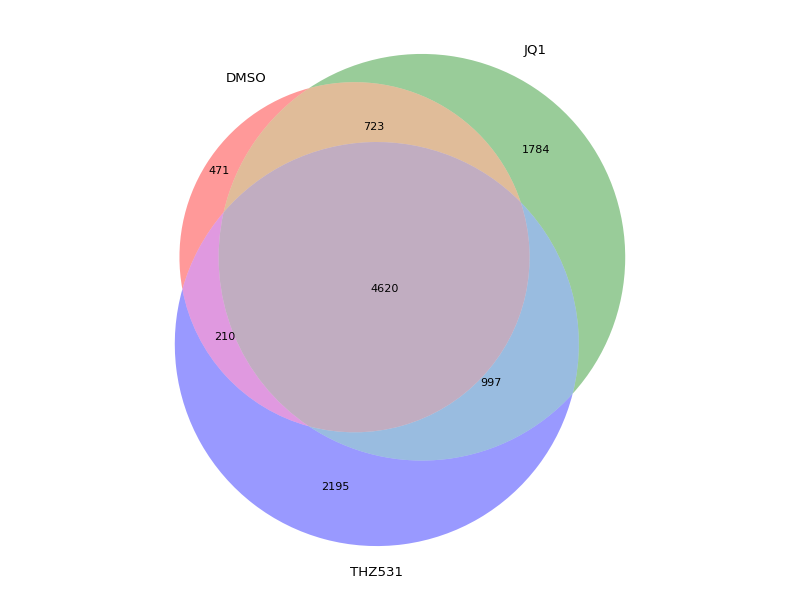

In [2]:
from IPython.display import Image
Image("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_venn.png")

#### Between replicates

In [11]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
for factor in DMSO JQ1 THZ531 ;
do
    python /data/reddylab/Alex/collab/20180214_JoshBlack/scripts/plot_overlap_as_venn_diagram.py \
        -i \
            /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.${factor}.rep1.masked.dedup.sorted_peaks.narrowPeak \
            /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.${factor}.rep2.masked.dedup.sorted_peaks.narrowPeak \
            /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.${factor}.rep3.masked.dedup.sorted_peaks.narrowPeak \
        --names ${factor}_rep1 ${factor}_rep2 ${factor}_rep3 \
        --bed \
        --overlap 0.5 \
        -o \
            /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_${factor}_venn.png \
            /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_${factor}_venn.pdf
done        

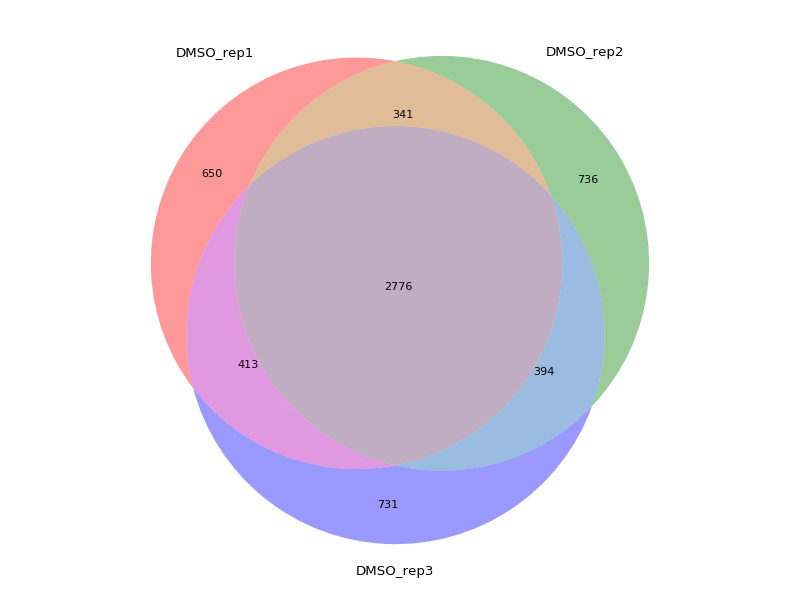

In [12]:
from IPython.display import Image, display
factor = 'DMSO'
display(Image("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_%s_venn.png" % factor))
    

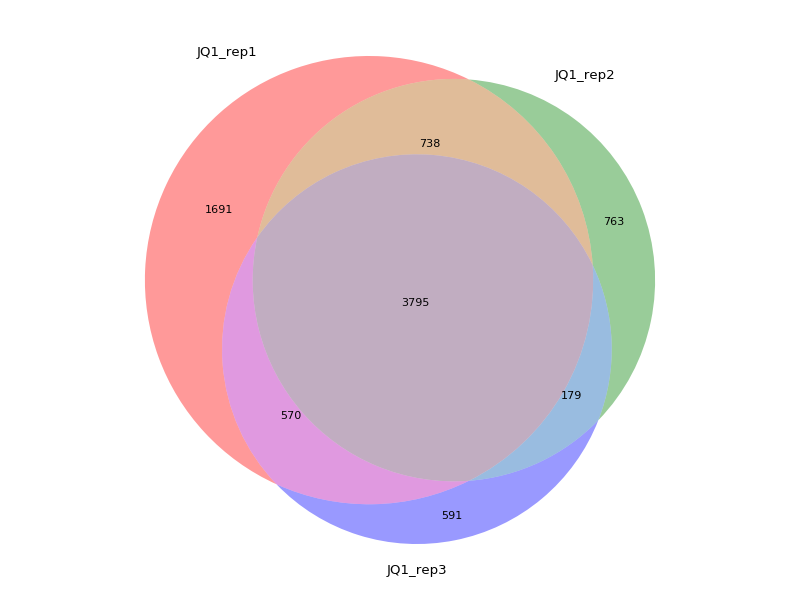

In [13]:
from IPython.display import Image, display
factor = 'JQ1'
display(Image("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_%s_venn.png" % factor))
    

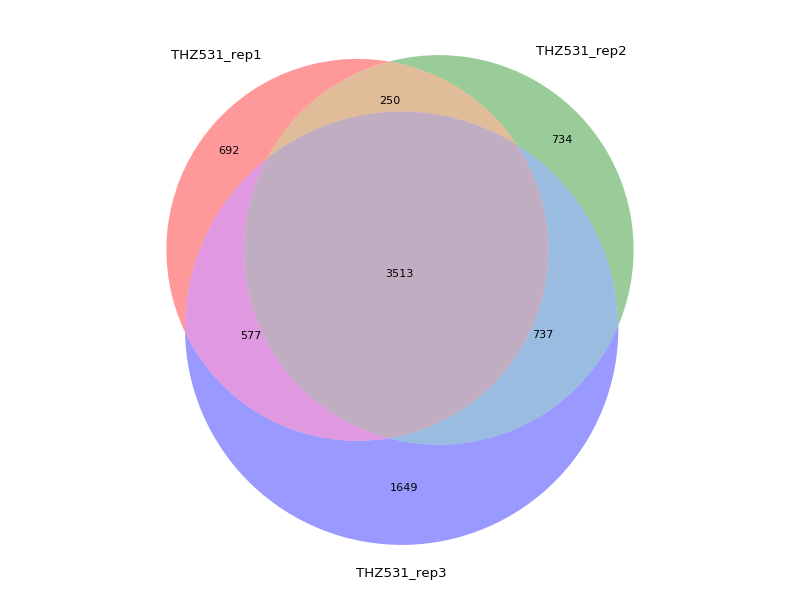

In [14]:
from IPython.display import Image, display
factor = 'THZ531'
display(Image("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_%s_venn.png" % factor))
    

### Peak overlaps between conditions in all replicates (this takes the peaks present in all replicates and computing overlaps there)

In [15]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex

cd /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/
for factor in DMSO JQ1 THZ531;
do
    bedtools intersect \
        -u \
        -a <(bedtools intersect \
            -r \
            -u \
            -f 0.5 \
            -a CAL51.p300.${factor}.rep1.masked.dedup.sorted_peaks.narrowPeak \
            -b CAL51.p300.${factor}.rep2.masked.dedup.sorted_peaks.narrowPeak) \
        -b CAL51.p300.${factor}.rep3.masked.dedup.sorted_peaks.narrowPeak \
    > CAL51.p300.${factor}.peaks_in_all_reps.bed
done  

In [16]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
python /data/reddylab/Alex/collab/20180214_JoshBlack/scripts/plot_overlap_as_venn_diagram.py \
    -i \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.DMSO.peaks_in_all_reps.bed \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.JQ1.peaks_in_all_reps.bed \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.THZ531.peaks_in_all_reps.bed \
    --names DMSO JQ1 THZ531 \
    --bed \
    -o \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_in_all_reps_venn.png \
        /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_in_all_reps_venn.pdf


Venn diagram of peaks in all reps 

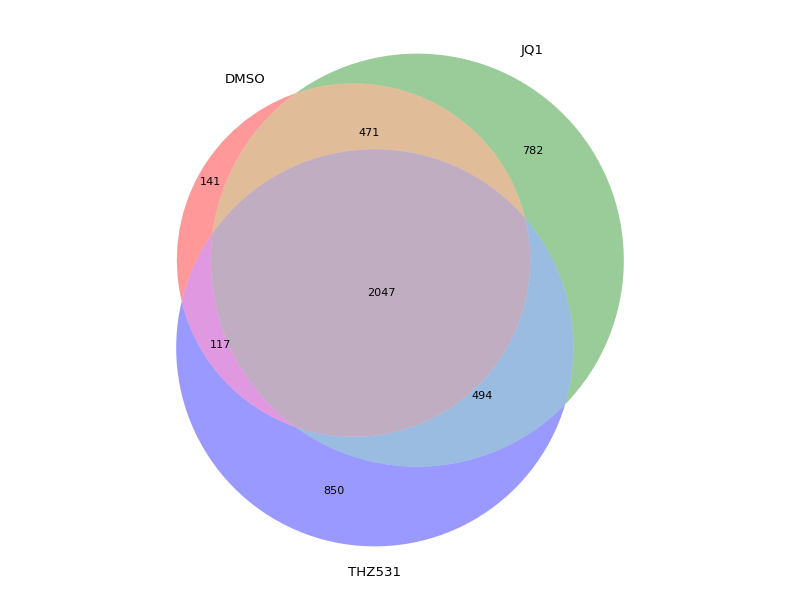

In [17]:
from IPython.display import Image, display
display(Image("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/peaks_in_all_reps_venn.png"))

### Find differentially bound regions

In a similar fashion that a DGE analysis, with ChIP-seq'ed samples one can ask, which are the most differentially bound regions between 2 given conditions?

In this analysis, we will investigate:
    - DMSO vs JQ1 (positive control)
    - DMSO vs THZ531
    - JQ1 vs THZ531


In [2]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/metadata/diff_bind_sample_sheet.csv
SampleID,Tissue,Factor,Condition,Replicate,bamReads,Peaks,PeakCaller
CAL51_P300_DMSO.rep1,CAL51,P300,DMSO,1,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.DMSO.rep1.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.DMSO.rep1.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_DMSO.rep2,CAL51,P300,DMSO,2,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.DMSO.rep2.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.DMSO.rep2.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_DMSO.rep3,CAL51,P300,DMSO,3,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.DMSO.rep3.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.DMSO.rep3.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_JQ1.rep1,CAL51,P300,JQ1,1,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.JQ1.rep1.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.JQ1.rep1.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_JQ1.rep2,CAL51,P300,JQ1,2,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.JQ1.rep2.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.JQ1.rep2.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_JQ1.rep3,CAL51,P300,JQ1,3,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.JQ1.rep3.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.JQ1.rep3.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_THZ531.rep1,CAL51,P300,THZ531,1,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.THZ531.rep1.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.THZ531.rep1.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_THZ531.rep2,CAL51,P300,THZ531,2,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.THZ531.rep2.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.THZ531.rep2.masked.dedup.sorted_peaks.narrowPeak,narrow
CAL51_P300_THZ531.rep3,CAL51,P300,THZ531,3,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/mapped_reads/CAL51.p300.THZ531.rep3.masked.dedup.sorted.bam,/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/peaks/CAL51.p300.THZ531.rep3.masked.dedup.sorted_peaks.narrowPeak,narrow

Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/metadata/diff_bind_sample_sheet.csv


In [3]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis.R
#!/bin/env/R
library(DiffBind)
DBA <- dba(sampleSheet='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/metadata/diff_bind_sample_sheet.csv')
DBA$config$yieldSize <- 50000
DBA <- dba.count(DBA)
DBA <- dba.contrast(DBA, categories=c(DBA_CONDITION))
DBA <- dba.analyze(DBA, method=DBA_DESEQ2, bParallel=FALSE)
dba.save(DBA, file='DBA', dir='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/', pre='dba_', ext='RData', bMinimize=FALSE)

Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis.R


In [4]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis.slurm
#!/bin/bash
--output=/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs/diffbind.out
source /data/reddylab/software/miniconda2/bin/activate r_conda
Rscript /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis.R

Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis.slurm


In [5]:
%%script --out dba_1 bash
sbatch -pnew,all --mem=32000 /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis.slurm

In [6]:
import re
blocking_job = re.match('Submitted batch job (\d+).*', dba_1).group(1)

Retrieve counts from DiffBind with consensus peak dataset

In [8]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_extract_counts.R
#!/bin/env/R
library(DiffBind)
DBA <- dba.load(file='DBA', dir='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/', pre='dba_', ext='RData')
DBA$config$yieldSize <- 50000

myDBA <- dba.count(DBA, peaks=NULL, score=DBA_SCORE_READS)
dba.peakset(myDBA,
           bRetrieve=TRUE,
           DataType=DBA_DATA_FRAME,
           writeFile='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/counts.df.txt')

dba.peakset(myDBA,
          bRetrieve=TRUE,
          writeFile='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/counts.genomic_ranges.txt')



Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_extract_counts.R


In [9]:
%%script --out dba_2 bash -s "$blocking_job"
source /data/reddylab/software/miniconda2/bin/activate r_conda
sbatch -pnew,all \
    --mem=32000 \
    --depend afterok:$1 \
    --output=/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs/diffbind_consensus_peakset_counts.df.out \
    <<'EOF'
#!/bin/bash
Rscript /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_extract_counts.R

EOF


In [10]:
import re
blocking_job = re.match('Submitted batch job (\d+).*', dba_2).group(1)

In [30]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis_2.R
#!/bin/env/R
library(DiffBind)
DBA <- dba.load(file='DBA', dir='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/', pre='dba_', ext='RData')
DBA$contrasts=NULL
DMSO_mask <- dba.mask(DBA, DBA_CONDITION, 'DMSO')
JQ1_mask <- dba.mask(DBA, DBA_CONDITION, 'JQ1')
THZ531_mask <- dba.mask(DBA, DBA_CONDITION, 'THZ531')

# FLAG
DBA <- dba.contrast(DBA, group1=DMSO_mask, name1='DMSO', group2=JQ1_mask, name2='JQ1')
DBA <- dba.contrast(DBA, group1=DMSO_mask, name1='DMSO', group2=THZ531_mask, name2='THZ531')
DBA <- dba.contrast(DBA, group1=JQ1_mask, name1='JQ1', group2=THZ531_mask, name2='THZ531')

DBA <- dba.analyze(DBA, method=DBA_DESEQ2, bParallel=FALSE)
dba.save(DBA, file='DBA_analyzed', dir='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/', pre='dba_', ext='RData', bMinimize=FALSE)

Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis_2.R


In [31]:
%%script --out dba_2 bash -s "$blocking_job"
sbatch -pnew,all \
    --mem 32000 \
    --depend=afterok:$1 \
    --output=/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs/diffbind_2.out \
    --wrap="source /data/reddylab/software/miniconda2/bin/activate r_conda; Rscript /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis_2.R"

In [32]:
import re
blocking_job = re.match('Submitted batch job (\d+).*', dba_2).group(1)

In [33]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis_3.R
#!/bin/env/R
library(GenomicRanges)
library(Homo.sapiens)
library(DiffBind)
library(liftOver)
library(rtracklayer)

geneRanges <- 
    function(db, column="ENTREZID")
{
    g <- genes(db, columns=column)
    col <- mcols(g)[[column]]
    genes <- granges(g)[rep(seq_along(g), elementNROWS(col))]
    mcols(genes)[[column]] <- as.character(unlist(col))
    genes
}

splitColumnByOverlap <-
    function(query, subject, column="ENTREZID", ...)
{
    olaps <- findOverlaps(query, subject, ...)
    f1 <- factor(subjectHits(olaps),
                 levels=seq_len(subjectLength(olaps)))
    splitAsList(mcols(query)[[column]][queryHits(olaps)], f1)
}

# LiftOver to hg38
chain <- import.chain("/data/reddylab/Reference_Data/Genomes/hg19/hg19ToHg38.over.chain")
gns = geneRanges(Homo.sapiens, column="SYMBOL")
gns = unlist(liftOver(gns, chain))

(DBA <- dba.load(file='DBA_analyzed', dir='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/', pre='dba_', ext='RData'))

generate_db_report <- 
    function(n, d, gns, th=0.2, ...){
        db_report <- dba.report(d, n, th=th, bUsePval=FALSE)
        db_report$SYMBOL <- splitColumnByOverlap(gns, db_report, "SYMBOL")
#         db_report$log2Fold <- log2(abs(db_report$Fold))
#         db_report$log2Fold[db_report$Fold <0] <- db_report$log2Fold[db_report$Fold <0]*-1
        treat_vs_contr <- paste0(d$contrast[[n]]$name1, '_', d$contrast[[n]]$name2)
        
        # Save results in tab-delimited file
        write.table(as.data.frame(db_report), 
            file=paste0('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/', treat_vs_contr, '.diffBind.txt'),
            quote = FALSE, row.names=FALSE, sep = "\t")
        treat_vs_contr
        
        # Create MA plot
        pdf(paste0('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/', treat_vs_contr, '.diffBind_MA.pdf'))
        dba.plotMA(DBA, contrast=n, bNormalized=FALSE)
        dev.off()

        # Plot correlation heatmap
        pdf(paste0('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/', treat_vs_contr, '.diffBind_corr.pdf'))
        dba.plotHeatmap(DBA, contrast=n, bNormalized=FALSE)
        dev.off()
        
    }

# plot correlation heatmap
pdf(paste0('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/diffBind_corr.pdf'))
plot(DBA)
dev.off()

    
dd <- lapply(seq(1,  length(DBA$contrasts)), generate_db_report, DBA, gns)



Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis_3.R


In [34]:
%%script --out dba_3 bash -s "$blocking_job"
# 
sbatch -pnew,all \
    --mem 16000 \
    --depend=afterok:$1 \
    --output=/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs/diffbind_3.out \
    --wrap="source /data/reddylab/software/miniconda2/bin/activate r_conda; Rscript /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/diff_bind_analysis_3.R"

## Differential binding analysis

### DMSO vs JQ1

In [1]:
from IPython.display import IFrame, display
comparisons = [
    "DMSO_JQ1",
    "DMSO_THZ531",
    "JQ1_THZ531"
]
for c in comparisons:
    display(IFrame("troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/%s.diffBind_MA.pdf" % c, 
                   width=800, height=600))

In [42]:
import pandas as pd
pd.read_csv('troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/DMSO_JQ1.diffBind.txt', 
            sep='\t')

,seqnames,start,end,width,strand,Conc,Conc_DMSO,Conc_JQ1,Fold,p.value,FDR,SYMBOL
0,chr18,48929958,48930678,721,*,5.80,5.05,6.30,-1.25,2.950000e-07,0.000522,SMAD7
1,chr18,48986970,48987529,560,*,6.73,6.19,7.12,-0.93,7.960000e-07,0.000704,character(0)
2,chr18,26575201,26575897,697,*,5.43,4.69,5.91,-1.22,4.880000e-06,0.002880,KCTD1
3,chr10,90931087,90931776,690,*,6.35,5.85,6.72,-0.87,1.390000e-05,0.005350,character(0)
4,chr8,122853342,122854019,678,*,4.72,3.80,5.28,-1.48,1.610000e-05,0.005350,ZHX2
5,chr4,183098581,183099172,592,*,4.86,3.99,5.39,-1.40,1.810000e-05,0.005350,WWC2-AS2
6,chr2,164792678,164793254,577,*,6.29,5.82,6.64,-0.82,4.990000e-05,0.009330,COBLL1
7,chr10,61993849,61994940,1092,*,6.28,5.78,6.65,-0.88,5.010000e-05,0.009330,ARID5B
8,chr12,46382916,46383528,613,*,5.72,5.14,6.13,-0.99,5.290000e-05,0.009330,character(0)
9,chr12,65895822,65896527,706,*,6.48,6.02,6.83,-0.81,5.540000e-05,0.009330,HMGA2


### DMSO vs THZ531

In [2]:
from IPython.display import IFrame
IFrame("troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/DMSO_THZ531.diffBind_MA.pdf", width=800, height=600)

In [45]:
import pandas as pd
pd.read_csv('troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/DMSO_THZ531.diffBind.txt', 
            sep='\t')

,seqnames,start,end,width,strand,Conc,Conc_DMSO,Conc_THZ531,Fold,p.value,FDR,SYMBOL
0,chr6,125948443,125948893,451,*,4.29,1.69,5.17,-3.47,2.260000e-12,1.190000e-08,character(0)
1,chr15,58590124,58590646,523,*,4.50,2.34,5.33,-2.99,3.730000e-12,1.190000e-08,character(0)
2,chr2,190946929,190947779,851,*,5.97,4.98,6.55,-1.57,4.730000e-12,1.190000e-08,GLS
3,chr7,80883308,80883985,678,*,5.37,4.11,6.04,-1.93,1.050000e-11,1.980000e-08,SEMA3C
4,chr15,48566635,48567074,440,*,4.36,2.26,5.18,-2.92,4.790000e-11,6.270000e-08,FBN1
5,chr4,83149802,83150474,673,*,5.80,4.78,6.39,-1.61,4.970000e-11,6.270000e-08,character(0)
6,chr8,32323388,32323853,466,*,4.48,2.58,5.27,-2.69,8.190000e-11,8.850000e-08,NRG1
7,chr11,87260102,87260557,456,*,4.79,3.20,5.53,-2.33,1.050000e-10,9.980000e-08,TMEM135
8,chr3,169360405,169360859,455,*,3.79,1.05,4.68,-3.63,9.610000e-10,7.440000e-07,MECOM
9,chrX,45775155,45775887,733,*,4.44,2.68,5.21,-2.53,9.820000e-10,7.440000e-07,character(0)


### JQ1 vs THZ531

In [3]:
from IPython.display import IFrame
IFrame("troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/JQ1_THZ531.diffBind_MA.pdf", width=800, height=600)

In [5]:
import pandas as pd
pd.read_csv('troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/JQ1_THZ531.diffBind.txt', 
            sep='\t')

,seqnames,start,end,width,strand,Conc,Conc_JQ1,Conc_THZ531,Fold,p.value,FDR,SYMBOL
0,chr20,31719697,31720543,847,*,6.51,7.13,5.41,1.72,3.210000e-16,2.530000e-12,BCL2L1
1,chr18,26453108,26453978,871,*,5.50,6.23,3.95,2.28,3.450000e-14,1.360000e-10,character(0)
2,chr9,124659039,124659885,847,*,5.57,6.27,4.16,2.10,1.170000e-13,3.070000e-10,"c(""MIR181A2HG"", ""NR6A1"")"
3,chr17,43665093,43666104,1012,*,5.51,6.21,4.11,2.10,2.600000e-13,5.130000e-10,character(0)
4,chr1,206052535,206053317,783,*,5.75,6.41,4.49,1.92,3.360000e-13,5.290000e-10,C1orf186
5,chr2,69779189,69779563,375,*,4.70,2.51,5.54,-3.03,4.830000e-13,6.340000e-10,ANXA4
6,chr8,54453914,54454393,480,*,4.86,5.65,2.97,2.68,1.360000e-12,1.530000e-09,character(0)
7,chrX,115566536,115567247,712,*,6.07,6.67,5.03,1.64,4.130000e-12,4.060000e-09,PLS3
8,chr20,31604070,31604509,440,*,5.19,5.90,3.74,2.16,8.420000e-12,7.370000e-09,character(0)
9,chr2,27729150,27729682,533,*,5.62,6.25,4.47,1.78,1.520000e-11,1.190000e-08,character(0)


## Moving to DESeq2 instead of DiffBind

Use the consensus peak set from DiffBind to extract peak counts. Then use DESeq2 directly to estimate DE peaks and create MA plots.

In [10]:
%%writefile /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/deseq2_analysis.R
#!/bin/env/R
library(DiffBind)
library(DESeq2)
require(ggplot2)

(DBA <- dba.load(file='DBA_analyzed', dir='/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/', pre='dba_', ext='RData'))


metadata <- read.csv('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/metadata/diff_bind_sample_sheet.csv')

counts_table <- read.csv('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/data/chip_seq/diffbind/counts.df.txt', 
                   sep="\t",
                  col.names = c(c("chrom", "start", "end"), DBA$samples$SampleID))

counts_only <- counts_table[, -c(1:3)]
rownames(counts_only) <- apply(counts_table[, c(1:3)] , 1 , paste , collapse = "-" )



coldata <- as.data.frame(metadata$Condition)
rownames(coldata) <- metadata$SampleID
colnames(coldata) <- c('condition')



dds <- DESeqDataSetFromMatrix(countData = counts_only,
                              colData = coldata,
                              design= ~ condition)


dds <- DESeq(dds)

cc <- list(
    c("DMSO","JQ1"),
    c("DMSO","THZ531"),
    c("JQ1","THZ531")
)

lapply(cc, function(contrast_pair, fdr_th=0.001){
    res <- results(dds, contrast=c("condition",contrast_pair[[1]], contrast_pair[[2]]), 
                   independentFiltering = T,
                  alpha=fdr_th)
    print(summary(res))
    print(resOrdered <- res[order(res$padj),])
    
    # Plot correlation heatmap
    pdf(paste0('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/', 
               contrast_pair[[1]], 
               "_vs_",
               contrast_pair[[2]], 
               '.deseq2_MA.pdf'))
    plotMA(res, alpha=fdr_th, ylim=c(-2,4),  main=paste(unlist(contrast_pair)))
    dev.off()
    
    # Save the results    
    write.table(resOrdered,
                file=paste0('/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/', 
                   contrast_pair[[1]], 
                   "_vs_",
                   contrast_pair[[2]], 
                   '.deseq2_results.txt'),
            quote = FALSE, row.names=TRUE, sep = "\t")


})


Overwriting /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/deseq2_analysis.R


In [12]:
%%script --out deseq2 bash -s "$blocking_job"
sbatch -pnew,all \
    --mem 16000 \
    --output=/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs/chipseq_deseq2_de_peaks.out \
    --wrap="source /data/reddylab/software/miniconda2/bin/activate r_conda; Rscript /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/scripts/deseq2_analysis.R"

Find closest gene to DE peak

In [14]:
%%bash
module load bedtools2
cd /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/
BEDFILES=($(/bin/ls -1 *.deseq2_results.txt))
sbatch -pnew,all \
    --array=0-$((${#BEDFILES[@]}-1)) \
    --output=/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/logs/chiseq_deseq2_closest_gene_%a.out \
    <<'EOF'
#!/bin/bash
BEDFILES=($(/bin/ls -1 *.deseq2_results.txt))
BEDFILE=${BEDFILES[${SLURM_ARRAY_TASK_ID}]}
bedtools closest \
    -D a \
    -a <(tail -n+2 ${BEDFILE} \
        | cut -f1 \
        | awk -F"-" -vOFS="\t" '{print $1,$2, $3}' \
        | sort -k1,1 -k2,2n \
        | sed -E 's/[ \t]+/\t/g') \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/v22/gencode.v22.annotation.gene_name.bed | cut -f1-4) \
> ${BEDFILE/deseq2_results.txt/deseq2_results.closest_gene.txt}
EOF

Submitted batch job 2721331


In [15]:
!head /data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/DMSO_vs_JQ1.deseq2_results.closest_gene.txt

chr1	940092	940538	chr1	924879	944581	SAMD11	0
chr1	941625	942146	chr1	924879	944581	SAMD11	0
chr1	1024684	1025012	chr1	1020122	1056118	AGRN	0
chr1	1164701	1165141	chr1	1167091	1167202	MIR200B	1951
chr1	2355097	2355483	chr1	2321252	2391707	MORN1	0
chr1	2360784	2361210	chr1	2321252	2391707	MORN1	0
chr1	2566162	2566476	chr1	2566409	2569888	RP3-395M20.7	0
chr1	2575688	2576170	chr1	2581559	2584533	RP3-395M20.9	5390
chr1	2578357	2578683	chr1	2581559	2584533	RP3-395M20.9	2877
chr1	8005158	8005555	chr1	8004403	8026308	ERRFI1	0


In [16]:
%matplotlib inline

====== DMSO_vs_JQ1 ======


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chrom_peak,start_peak,end_peak,chrom_gene,start_gene,end_gene,gene_name,distance


====== DMSO_vs_THZ531 ======


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chrom_peak,start_peak,end_peak,chrom_gene,start_gene,end_gene,gene_name,distance
chr1-12478048-12478662,66.555317,1.008506,0.214196,4.708345,2.497357e-06,2.544062e-04,chr1,12478048,12478662,chr1,12230066,12512047,VPS13D,0
chr1-155642382-155642880,8.233654,-2.027660,0.425294,-4.767668,1.863704e-06,2.179132e-04,chr1,155642382,155642880,chr1,155614725,155660245,RP11-29H23.5,0
chr1-172354352-172354713,10.630401,-1.904228,0.403014,-4.724962,2.301585e-06,2.443192e-04,chr1,172354352,172354713,chr1,171841497,172418466,DNM3,0
chr1-183227612-183228014,7.216112,-2.033602,0.436575,-4.658086,3.191624e-06,3.005965e-04,chr1,183227612,183228014,chr1,183186237,183244900,LAMC2,0
chr1-206050748-206051176,27.907237,1.402866,0.294423,4.764792,1.890481e-06,2.179132e-04,chr1,206050748,206051176,chr1,206037230,206102459,C1orf186,0
chr1-206052535-206053317,54.711296,1.214384,0.232430,5.224739,1.744005e-07,3.741375e-05,chr1,206052535,206053317,chr1,206037230,206102459,C1orf186,0
chr1-206058391-206058733,11.683446,1.875892,0.413736,4.534029,5.786908e-06,4.339057e-04,chr1,206058391,206058733,chr1,206037230,206102459,C1orf186,0
chr1-23973494-23973987,31.382289,1.316644,0.288186,4.568735,4.906774e-06,3.980329e-04,chr1,23973494,23973987,chr1,23964803,23980927,SRSF10,0
chr1-241107366-241107826,21.216384,1.433398,0.326232,4.393805,1.113838e-05,7.041940e-04,chr1,241107366,241107826,chr1,240775513,241357230,RGS7,0
chr1-31099390-31099937,22.426292,1.405300,0.324709,4.327882,1.505503e-05,8.676866e-04,chr1,31099390,31099937,chr1,31094986,31095558,SEPW1P <5k,-3833


====== JQ1_vs_THZ531 ======


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chrom_peak,start_peak,end_peak,chrom_gene,start_gene,end_gene,gene_name,distance
chr1-109959911-109960762,18.753939,-1.350782,0.320065,-4.220333,2.439413e-05,6.739545e-04,chr1,109959911,109960762,chr1,109984685,110023741,AHCYL1 >10k,23924
chr1-12478048-12478662,66.555317,1.106009,0.208907,5.294252,1.195044e-07,1.174868e-05,chr1,12478048,12478662,chr1,12230066,12512047,VPS13D,0
chr1-172254661-172255318,48.092409,0.923415,0.224584,4.111660,3.928252e-05,9.686276e-04,chr1,172254661,172255318,chr1,171841497,172418466,DNM3,0
chr1-172354352-172354713,10.630401,-1.842984,0.390800,-4.715932,2.406069e-06,1.300996e-04,chr1,172354352,172354713,chr1,171841497,172418466,DNM3,0
chr1-183227612-183228014,7.216112,-2.246391,0.433384,-5.183368,2.179150e-07,1.896111e-05,chr1,183227612,183228014,chr1,183186237,183244900,LAMC2,0
chr1-198357104-198357569,5.655449,-2.088309,0.448917,-4.651878,3.289251e-06,1.596130e-04,chr1,198357104,198357569,chr1,198369296,198369385,AC093419.1 >10k,11728
chr1-198621364-198621902,23.667937,1.305070,0.313671,4.160639,3.173591e-05,8.199345e-04,chr1,198621364,198621902,chr1,198638670,198757283,PTPRC >10k,16769
chr1-200893429-200893928,40.788254,1.125599,0.243510,4.622395,3.793356e-06,1.709268e-04,chr1,200893429,200893928,chr1,200891047,200915735,C1orf106,0
chr1-200896183-200897015,39.889676,1.511037,0.266420,5.671637,1.414391e-08,2.199373e-06,chr1,200896183,200897015,chr1,200891047,200915735,C1orf106,0
chr1-205301259-205301796,42.980169,1.093807,0.234404,4.666333,3.066221e-06,1.547420e-04,chr1,205301259,205301796,chr1,205302058,205321755,NUAK2 <1k,263


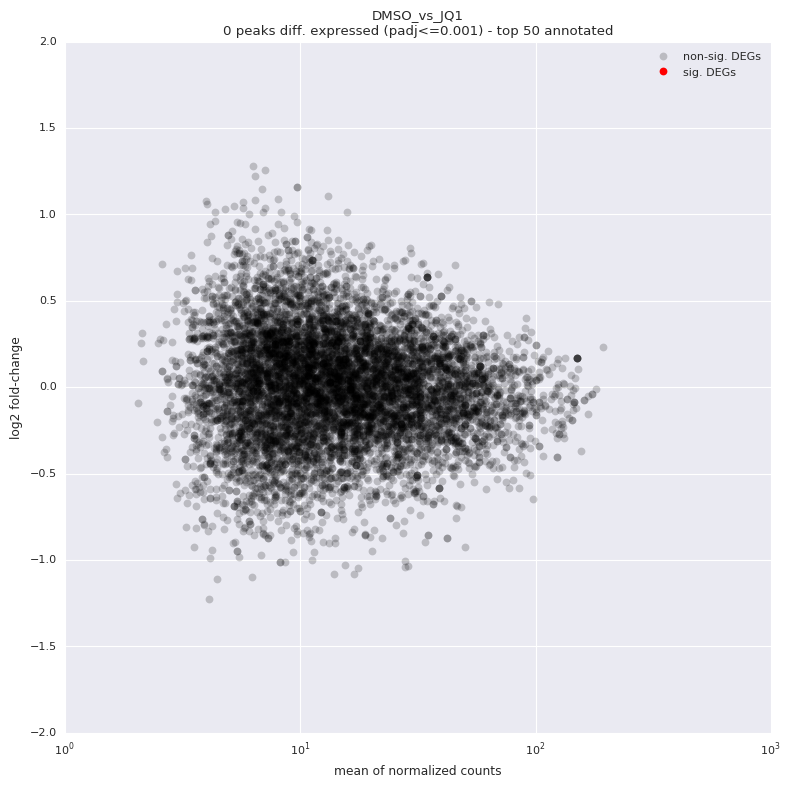

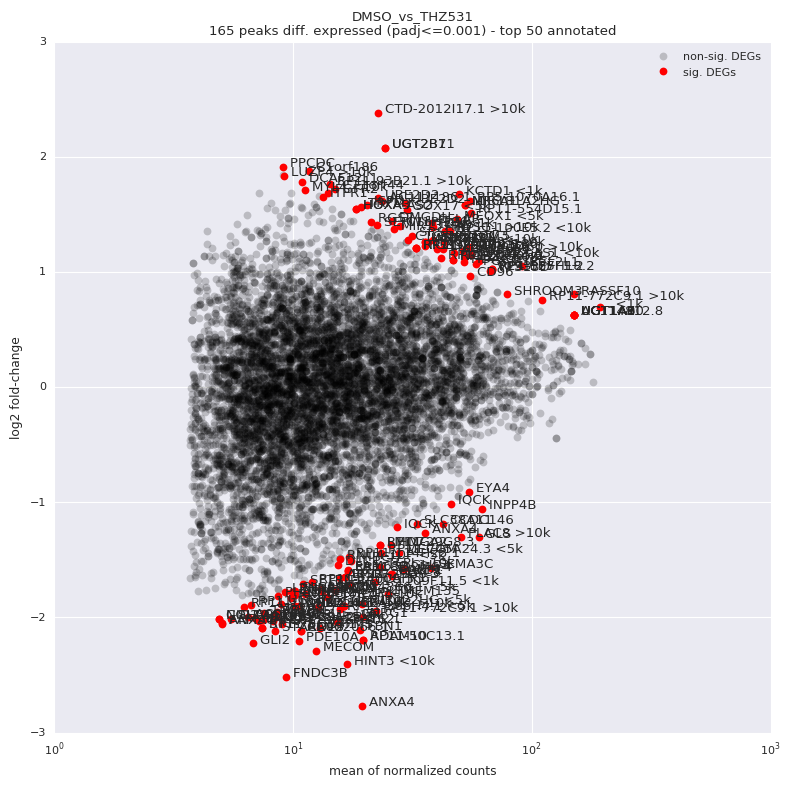

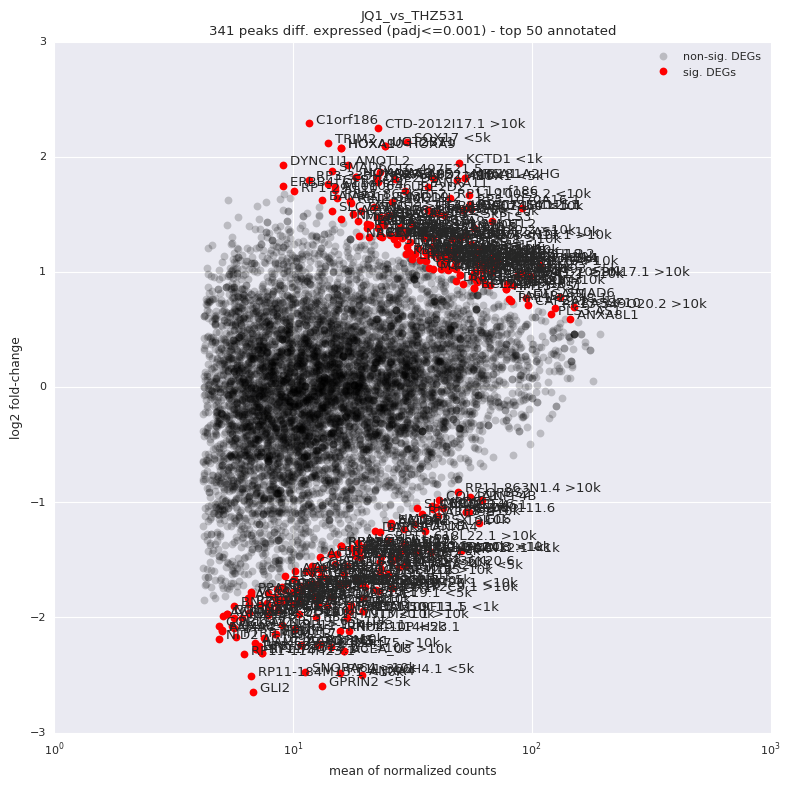

In [18]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")

def abbreviate_distance(d):
    if d == 0: return ""
    if d < 1000: return "<1k"
    if d < 5000: return "<5k"
    if d < 10000: return "<10k"
    if d >= 10000: return ">10k" 
    


# Config
pval_thres = 0.001
top_to_report = 50
comparisons = [
    "DMSO_vs_JQ1",
    "DMSO_vs_THZ531",
    "JQ1_vs_THZ531",
#     "dCas9_P300_g3_vs_Cascade_HBE_crRNA"
]

for comparison in comparisons:
    df = pd.read_csv("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/%s.deseq2_results.txt" % comparison,
                    sep="\t")
    df_closets = pd.read_csv("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/data/%s.deseq2_results.closest_gene.txt" % comparison,
                        sep='\s+',
                        names=['chrom_peak', 'start_peak', 'end_peak', 'chrom_gene', 'start_gene', 'end_gene', 'gene_name', 'distance'])
    df_closets.index = df_closets.loc[:, ['chrom_peak', 'start_peak', 'end_peak']].apply(lambda x: "-".join([str(xx) for xx in x]), axis=1)
    df.index = df.index.str.replace(" ", "")
    
    # Add binned distance to gene name
    df_closets.loc[:, 'gene_name'] = df_closets.loc[:, ['gene_name', 'distance']].apply(lambda x: " ".join([x['gene_name'], 
                                                                                                            abbreviate_distance(abs(x['distance']))]), 
                                                                                        axis=1)
    
    df = df.join(df_closets)
    
    # Plot MA
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[df.padj>pval_thres]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values, 
            'ko', alpha=0.2, label='non-sig. DEGs')

    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
#     ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values, 'ro', alpha=0.2)

    # Annotate significant peaks
    df_annotate = df_sig
    ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

    for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['gene_name'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                    textcoords='offset points')

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d peaks diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.legend()
    plt.tight_layout()
    
    # Save annotated MA plot
    plt.savefig("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/degs%s.with_genes.annotated_plot_MA.pdf" % comparison)
    
    # Save annotated genes without pseudogenes
    df_annotate.to_csv("/data/reddylab/Hazel/troubleshoot/processing/chip_seq/analysis/results/chip_seq/plots/degs%s.with_genes.sig_DE_no_pseudogenes.txt" % comparison,
                      sep='\t',
                      index=False)
    
    # print table of values 
    print "======", comparison, "======"
    display(df_annotate)
    
   
